In [1]:
from sklearn.model_selection import train_test_split as tts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D,BatchNormalization
from keras.layers import Dense,MaxPool1D,Dropout,Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('data.csv')

In [3]:
# 5 values from of data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data=data.drop(columns=['id','Unnamed: 32'],axis=1)
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
param={'B':0,'M':1}
y=data['diagnosis'].map(param)
X=data.drop(columns=['diagnosis'],axis=1)
print(X.shape,y.shape)

(569, 30) (569,)


In [10]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [11]:
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.2,random_state=16)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(455, 30) (455,)
(114, 30) (114,)


In [12]:
xtrain=xtrain.reshape(-1,30,1)
xtest=xtest.reshape(-1,30,1)

In [13]:
epochs=50
model=Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [14]:
model.compile(optimizer=Adam(lr=0.000005),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(xtrain,ytrain,epochs=epochs,validation_data=(xtest,ytest))

Epoch 1/50
15/15 [==============================] - 1s 65ms/step - loss: 0.9618 - accuracy: 0.5538 - val_loss: 0.6808 - val_accuracy: 0.6404
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.9661 - accuracy: 0.5495 - val_loss: 0.6663 - val_accuracy: 0.6579
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.9334 - accuracy: 0.5714 - val_loss: 0.6511 - val_accuracy: 0.6491
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.9610 - accuracy: 0.5956 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.8679 - accuracy: 0.6330 - val_loss: 0.6232 - val_accuracy: 0.6579
Epoch 6/50
15/15 [==============================] - 0s 16ms/step - loss: 0.8777 - accuracy: 0.6110 - val_loss: 0.6100 - val_accuracy: 0.6667
Epoch 7/50
15/15 [==============================] - 0s 16ms/step - loss: 0.7801 - accuracy: 0.6440 - val_loss: 0.5969 - val_accuracy: 0.6930
Epoch 8/50
15

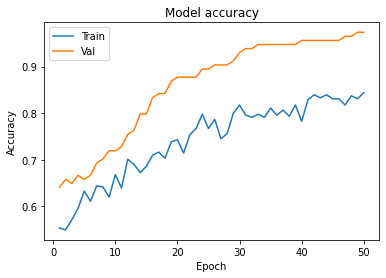

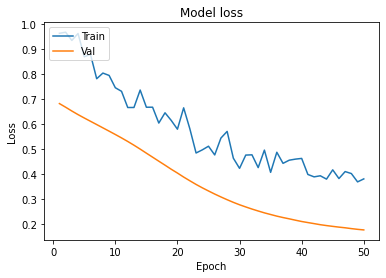

In [16]:
# making the history plot
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, epochs)